In [8]:
from scipy import optimize
import sympy as sp
import warnings
import pandas as pd
import numpy as np
from sympy import *
from copy import deepcopy
from scipy.optimize import brentq
from sympy.plotting import plot
from sympy.plotting.plot import MatplotlibBackend, Plot


def golden_ratio(func, search_area, extreme_type='min', accuracy=10**(-5),
                 maxiter=500, interim_results=False, dataset_rec=False):
    """
    Returns dict with the minimum or maximum of a function of one variable on 
    the segment [a, b] using the golden ratio method, value of function, report
    and intermediate results in pandas.DataFrame (optional).
    Given a function of one variable and a possible bracketing interval,
    return the minimum or maximum of the function isolated to a fractional
    precision of accuracy.
    Parameters
    ----------
    func : str
        Objective function to minimize or maximize.
    search_area : tuple or list
        [a, b], where (a<b) – the interval within which the maximum
        and minimum are searched.
    accuracy : float, optional
        x tolerance stop criterion.
    maxiter : int
        Maximum number of iterations to perform.
    interim_results : bool, optional
        If True, print intermediate results.
    dataset_rec : bool, optional
        If True, an entry in pandas.DataFrame intermediate results.
    Examples
    --------
    >>> from HW2.OneDimOptimization import golden_ratio
    >>> minimum = golden_ratio(func='x**2', search_area=(1, 2))
    >>> print(minimum['point'])
    1.0000048224378428
    """
    str_error = 'Длина отрезка должна быть больше заданной точности'
    assert search_area[1] - search_area[0] > accuracy, str_error
    res = {'point': None, 'value_func': None, 'report': None,
           'interim_results_dataset': None}
    df = pd.DataFrame(columns=['a', 'b', 'x1', 'x2', 'f1', 'f2'])
    x = sp.Symbol('x')
    try:
        func = eval(func)
    except NameError:
        print('Функция должна быть задана через x')
        return None
    proportion = 1.6180339887
    a, b = search_area
    iterat = 0
    while abs(b - a) >= accuracy and iterat != maxiter:
        iterat += 1
        x1 = b - (b-a) / proportion
        x2 = a + (b-a) / proportion
        f1, f2 = float(func.subs({x: x1})), float(func.subs({x: x2}))
        if dataset_rec:
            d = {'a': a, 'b': b, 'x1': x1, 'x2': x2, 'f1': f1, 'f2': f2}
            df = df.append(d, ignore_index=True)

        if extreme_type == 'min':
            if f1 >= f2:
                a = x1
            else:
                b = x2
        elif extreme_type == 'max':
            if f1 <= f2:
                a = x1
            else:
                b = x2

        if interim_results:
            print(f'''{iterat}:
            a = {a}, b = {b},
            x1 = {x1}, x2 = {x2},
            f1 = {f1}, f2 = {f2}''')

    if dataset_rec:
        res['interim_results_dataset'] = df
    res['point'] = (a+b) / 2
    res['value_func'] = func.subs({x: res['point']})
    if abs(b-a) <= accuracy:
        res['report'] = 0
    elif iter == maxiter:
        res['report'] = 1
    else:
        res['report'] = 2
    return res
  
  
def get_sympy_subplots(plot: Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.fig, backend.ax[0]
  

def center_point(F, x1, x2, x3):
    if (x1, F(x1)) == (x2, F(x2)) or (x2, F(x2)) == (x3, F(x3)) or (x1, F(x1)) == (x3, F(x3)):
        return None
    f_1, f_2, f_3 = F(x1), F(x2), F(x3)
    
    a1 = (f_2 - f_1) / (x2 - x1)
    a2 = 1/(x3 - x2)*((f_3 - f_1)/(x3 - x1) - (f_2 - f_1)/(x2 - x1))
    
    point = 0.5*(x1 + x2 - a1/a2)
    return point
  
 
def parabola_method(func: str,
                    limits: list,
                    type_extr = 'min',
                    accuracy: float=10**(-5),
                    max_iterations: int=500,
                    intermediate_results: bool=False,
                    intermediate_writing: bool=False,
                    figure=True):
    """
    Search for the extremum of a function of one variable using the parabola method.
    
    args:
        mandatory:
            - func - function in analytical form;
            - limits - optimization area boundaries;
        optional:
            - accuracy - optimization precision by argument (default: 10^-5);
            - max_iterations - maximum number of iterations (default: 500;
            - intermediate_results - flag "output intermediate results" (default: False);
            - intermediate_writing - flag "writing intermediate results to dataset" (default: False);
            
    outputs:
        - The found value of the extremum point coordinate;
        - Function value at the extremum point;
        - Algorithm report;
    """
    try:
        X = symbols('X')
        F = eval(func)

        if type_extr == 'max':
            F = F * (-1)

        left_hand, right_hand = eval(limits)

        left_hand = float(left_hand)
        right_hand = float(right_hand)

        if left_hand > right_hand:
            left_hand, right_hand = right_hand, left_hand

        results = pd.DataFrame(columns=['x1', 'x2', 'x3', 'f1', 'f2', 'f3'])
        iteration_num = 0
        d = 100
        while iteration_num < max_iterations:
            # need to satisfy inequality x1<x2<x3, f(x1) >= f(x2) <= f(x3) 

            if not(d > accuracy) and d != 0.0:
                if intermediate_writing:
                    if intermediate_results:
                        print(f"iteration_num = {iteration_num}; x1 = {x1}; x2 = {x2}; x3 = {x3}; f1 = {f1}; f2 = {f2}; f3 = {f3}")
                    if intermediate_writing:
                        results = results.append({'x1': x1, 'x2': x2, 'x3': x3, 'f1': f1, 'f2': f2, 'f3': f3}, ignore_index=True)
                print(results)
                if figure:
                    f_res = F.subs(x, x_res)
                    p = plot(func, show=False)
                    fig, axe = get_sympy_subplots(p)
                    axe.plot(x_res, f_res, "o", c='red')
                    fig.show()
                return x_res, f_res, 'Значение с заданной точностью', d

            # first step
            if iteration_num == 0:
                x1 = left_hand
                x3 = right_hand
                x2 = (x1+x3)/2


            f1 = F.subs(X, x1)
            f2 = F.subs(X, x2)
            f3 = F.subs(X, x3)


            # second step
            # first  formula - a0 = f1, a1 = (f2-f1)/(x2-x1), a2 = 1/(x3-x2) * ((f3-f1)/(x3-x1) - (f2-f1)/(x2-x1))
            # second formula - x_ = 1/2*(x1 + x2 - a1/a2)
            a0 = float(deepcopy(f1))
            a1 = float((f2-f1)/(x2-x1))
            a2 = float(1/(x3-x2) * ((f3-f1)/(x3-x1) - (f2-f1)/(x2-x1)))


            if iteration_num > 0:
                x_old = deepcopy(x_)

            x_ = 1/2*(x1 + x2 - a1/a2)


            # check num of step - go to step 4 if its first step
            if iteration_num > 0:
                d = abs(x_old - x_)

                if d <= accuracy:
                    x_res = deepcopy(x_)


            # step 4
            f_x_ = F.subs(X, x_)

            # step 5
            # suppose x1 = x_ = ..., f1 = f_x_ = ...
            if x1 < x_ < x2 < x3 and f_x_ >= f2: # x* in [x_, x3]
                x1 = deepcopy(x_)
                f1 = deepcopy(f_x_)
            elif x1 < x2 < x_ < x3 and f2 >= f_x_: # x* in [x2, x3]
                x1 = deepcopy(x2)
                f1 = deepcopy(f2)
                x2 = deepcopy(x_)
                f2 = deepcopy(f_x_)

            iteration_num += 1
            if intermediate_results:
                print(f"iteration_num = {iteration_num}; x1 = {x1}; x2 = {x2}; x3 = {x3}; f1 = {f1}; f2 = {f2}; f3 = {f3}")
            if intermediate_writing:
                results = results.append({'x1': x1, 'x2': x2, 'x3': x3, 'f1': f1, 'f2': f2, 'f3': f3}, ignore_index=True)

        f_res = F.subs(X, x_res)

        if intermediate_writing:
            print(results)

        if figure:
            p = plot(func, show=False)
            fig, axe = get_sympy_subplots(p)
            axe.plot(x_res, f_res, "o", c='red')
            fig.show()

        return x_res, f_res, 'Достигнуто максимальное количество итераций'
    except:
        return 'Выполнено с ошибкой'


def BrantMethod(func: str,
                    limits: list,
                    accuracy: float=10**(-5),
                    max_iterations: int=500,
                    intermediate_results: bool=False,
                    intermediate_writing: bool=False):
    
    r = (3 - 5**(1/2)) / 2
    
    a, b = limits
    
    x = a + r*(b - a)
    w = a + r*(b - a)
    v = a + r*(b - a)
    
    d_cur = a - b
    d_prv = a - b
    
    results = pd.DataFrame(columns=['step_num', 'a', 'b', 'x', 'w', 'v', 'u'])
    step_num = 0
    while max(x - a, b - x) > accuracy:
        
        if step_num >= max_iterations:
            if intermediate_results:
                print(f'step_num: {step_num}, a: {a}, b: {b}, x: {x}, w: {w}, v: {w}, u: {u}')
            if intermediate_writing:
                print(result)
                
            return x, func(x), 'Достигнуто макисмальное количество итераций'
            
        g = d_prv / 2
        d_prv = d_cur
        u = center_point(F, x, w, v)
        if not u or (u < a or u > b) or abs(u - x) > g:
            if x < (a + b) / 2:
                u = x + r*(b - x)
                d_prv = b - x
            else:
                u = x - r*(x - a)
                d_prv = (x - a)
        d_cur = abs(u - x)
        
        if func(u) > func(x):
            if u < x:
                a = u
            else:
                b = u
            if func(u) <= func(w) or w == x:
                v = w
                w = u
            else:
                if func(u) <= func(v) or v == x or v == w:
                    v = u
        else:
            if u < x:
                b = x
            else:
                a = x
            v = w
            w = x
            x = u
        step_num += 1
        if intermediate_results:
            print(f'step_num: {step_num}, a: {a}, b: {b}, x: {x}, w: {w}, v: {w}, u: {u}')
        if intermediate_writing:
            results = results.append({'step_num': step_num, 'a': a, 'b': b, 
                                      'x': x, 'w': w, 'v': v, 'u': u}, ignore_index=True)
            
    if intermediate_writing:
                print(result)
    
    return x, func(x), 'Достигнута заданная точность'

  
def bfgs(func, diff_func, x0, extreme_type='min', accuracy=10**-5, maxarg=100,
         firstW=10**-4, secondW=0.1, maxiter=500, interim_results=False,
         dataset_rec=False):
    """
    Minimize or maximize a function using the BFGS algorithm.
    Parameters
    ----------
    func : callable ``f(x)``
        Objective function to be minimized or maximized.
    diff_func : callable ``f'(x)``
        Objective function gradient.
    x0 : float, int
        Starting point.
    extreme_type : str, optional
        Maximizing or minimizing.
    accuracy : float, optional
        Gradient norm (abs) in x0 must be less than `accuracy` before successful
        termination.
    maxarg : float, int, optional
        Maximum value of the argument function.
    firstW : int or ndarray, optional
        Parameter for Armijo condition rule.
    secondW : callable, optional
        Parameter for curvature condition rule.
    maxiter : int, optional
        Maximum number of iterations to perform.
    interim_results : bool, optional
        If True, print intermediate results.
    dataset_rec : bool, optional
        If True, an entry in pandas.DataFrame intermediate results.
    Examples
    --------
    >>> from HW2.OneDimOptimization import bfgs
    >>> def f(x):
    ...     return -x/(x**2+2)
    ... def f1(x):
    ...     return 2*x**2/(x**2+2)**2 - 1/(x**2+2)
    >>> bfgs(f, f1, 1, maxiter=5000, extreme_type='max')
    {'point': -1.4142509823545781,
     'value_func': 0.35355339046951084,
     'report': 1,
     'interim_results_dataset': None}
    >>> bfgs(f, f1, 1, maxiter=5000)
    {'point': 1.4142144676627526,
     'value_func': -0.35355339059320134,
     'report': 1,
     'interim_results_dataset': None}
    """
    if extreme_type == 'max':
        f = lambda x: -func(x)
        diff_f = lambda x: -diff_func(x)
    res = {'point': None, 'value_func': None, 'report': None,
           'interim_results_dataset': None}
    dataset = []
    iterat = 0
    if extreme_type == 'max':
        g = diff_f(x0)
    else:
        g = diff_func(x0)
    Hk = 1  # is initial approximation
    xk = x0
    while abs(g) > accuracy and iterat < maxiter and xk < maxarg:
        iterat += 1
        if dataset_rec:
            dataset.append([xk, func(xk), g, Hk])
        if interim_results:
            print(f'''{iterat}:
            xk = {xk}    f(xk) = {func(xk)}    g = {g}    Hk = {Hk}''')
        pk = -Hk * g
        try:
            if extreme_type == 'max':
                line_search = optimize.line_search(f, diff_f, np.array(xk),
                                                   np.array(pk), c1=firstW,
                                                   c2=secondW)
            else:
                line_search = optimize.line_search(func, diff_func, np.array(xk),
                                                   np.array(pk), c1=firstW,
                                                   c2=secondW)
            if line_search[0]:
                alpha_k = line_search[0]
            else:
                print('не смогли найти лучшее приближение')
                res['report'] = 4
                break
        except optimize.linesearch.LineSearchWarning:
            print('не смогли найти лучшее приближение')
            res['report'] = 4
            break
        xkp = xk + alpha_k * pk
        sk = xkp - xk
        xk = xkp
        if extreme_type == 'max':
            g2 = diff_f(xk)
        else:
            g2 = diff_func(xkp)
        yk = g2 - g
        g = g2

        rho = 1.0 / (yk * sk)
        A1 = 1 - rho * sk * yk
        A2 = 1 - rho * yk * sk
        Hk = A1 * Hk * A2 + (rho * sk**2)


    res['point'] = xk
    res['value_func'] = func(xk)
    if dataset_rec:
        res['interim_results_dataset'] = pd.DataFrame(dataset,
                                                      columns=['xk', 'f', 'g', 'Hk'])
    if abs(g) <= accuracy and res['report'] != 4:
        res['report'] = 1
    elif iterat == maxiter and res['report'] != 4:
        res['report'] = 2
    elif xk >= maxarg and res['report'] != 4:
        res['report'] = 3
    return res

In [2]:
golden_ratio('x**2+5', search_area = [-10, 10])

{'point': 2.052817948735756e-06,
 'value_func': 5.00000000000421,
 'report': 0,
 'interim_results_dataset': None}

In [3]:
parabola_method('X**2+5', limits='[-10, 10]', figure=False)

(0.0, 5, 'Достигнуто максимальное количество итераций')

In [9]:
def f(x):
    return  x**2+5
def f1(x):
    return  2*x


In [22]:
def F(x):
    return  x**2+5
BrantMethod(F, limits=[-10, 10])

(1.9736532008703576e-16, 5.0, 'Достигнута заданная точность')

In [11]:
bfgs(f, f1, x0=3)

{'point': 0.0, 'value_func': 5.0, 'report': 1, 'interim_results_dataset': None}

In [12]:
def f(x):
    return x**4+x**2+x+1
def f1(x):
    return 4*x**3 + 2*x + 1

In [13]:
golden_ratio('x**4+x**2+x+1', search_area = [-1, 0])

{'point': -0.3854574897423595,
 'value_func': 0.785195253149063,
 'report': 0,
 'interim_results_dataset': None}

<ipython-input-8-dc01166642bb>:242: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(-0.37414500683994534,
 0.785435135664111,
 'Достигнуто максимальное количество итераций')

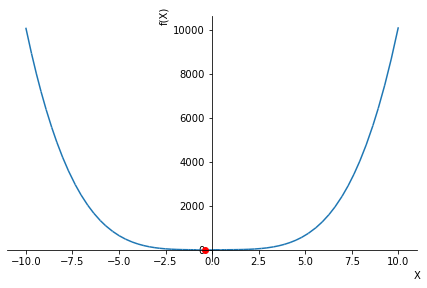

In [14]:
parabola_method('X**4+X**2+X+1', limits='[-1, 0]')

In [15]:
def F(x):
    return x**4+x**2+x+1
BrantMethod(F, limits=[-1, 0])

(-0.38545849851819786, 0.785195253147138, 'Достигнута заданная точность')

In [17]:
bfgs(f, f1, x0=0)

{'point': -0.3854589403088574,
 'value_func': 0.7851952531475073,
 'report': 1,
 'interim_results_dataset': None}

In [18]:
def f(x):
    return np.exp(x)+1/x
def f1(x):
    return np.exp(x) - 1/x**2

In [19]:
golden_ratio('exp(x)+1/x', search_area = [0.5, 1.5])

{'point': 0.7034686122265748,
 'value_func': 3.44227729450047,
 'report': 0,
 'interim_results_dataset': None}

<ipython-input-8-dc01166642bb>:242: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(0.7244359150468127,
 3.44395109505146,
 'Достигнуто максимальное количество итераций')

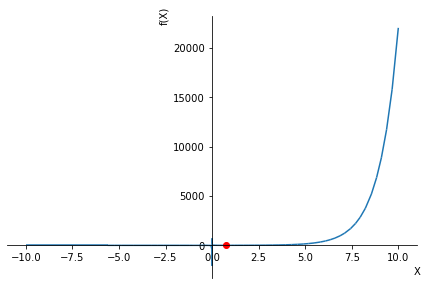

In [20]:
parabola_method('exp(X)+1/X', limits='[0.5, 1.5]')

In [23]:
def F(x):
    return np.exp(x)+1/x
BrantMethod(F, limits=[0.5, 1.5])

(0.7034674218656566, 3.442277294494974, 'Достигнута заданная точность')

In [24]:
bfgs(f, f1, x0=1)

не смогли найти лучшее приближение


E:\Anaconda\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


{'point': 1,
 'value_func': 3.718281828459045,
 'report': 4,
 'interim_results_dataset': None}

In [25]:
def f(x):
    return x**2-2*x+np.exp(-x)
def f1(x):
    return 2*x - 2 - np.exp(-x)

In [26]:
golden_ratio(func='x**2-2*x+exp(-x)', search_area=(-1, 1.5))

{'point': 1.1571848250458614,
 'value_func': -0.660922988059385,
 'report': 0,
 'interim_results_dataset': None}

<ipython-input-8-dc01166642bb>:242: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(1.1574408488928294,
 -0.660922912283779,
 'Достигнуто максимальное количество итераций')

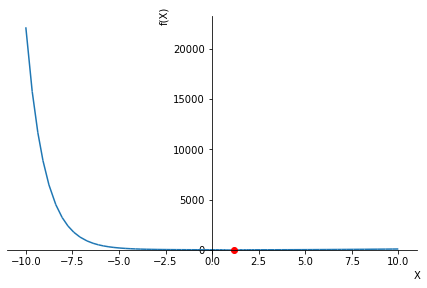

In [27]:
parabola_method('X**2-2*X+exp(-X)', limits='[-1, 1.5]')

In [28]:
def F(x):
    return x**2-2*x+exp(-x)
BrantMethod(F, limits=[-1, 1.5])

(1.15718495355366, -0.660922988059403, 'Достигнута заданная точность')

In [29]:
bfgs(f, f1, x0=1)

{'point': 1.1571849508274354,
 'value_func': -0.660922988059403,
 'report': 1,
 'interim_results_dataset': None}

In [30]:
def f(x):
    return -3*x*np.sin(0.75*x)+np.exp(-2*x)
def f1(x):
    return -2.25*x*np.cos(0.75*x) - 3*np.sin(0.75*x) - 2*np.exp(-2*x)

In [31]:
golden_ratio(func='-3*x*sin(0.75*x)+exp(-2*x)', search_area=(0, 2*np.pi))

{'point': 2.7064759148330357,
 'value_func': -7.27435797007356,
 'report': 0,
 'interim_results_dataset': None}

<ipython-input-8-dc01166642bb>:242: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(2.29642407867976,
 -6.80021461227076,
 'Достигнуто максимальное количество итераций')

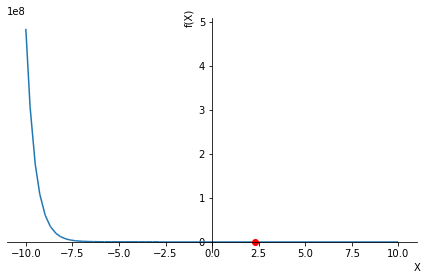

In [32]:
parabola_method('-3*X*sin(0.75*X)+exp(-2*X)', limits='[0, 2*pi]')

In [33]:
def F(x):
    return -3*x*sin(0.75*x)+exp(-2*x)
BrantMethod(F, limits=[0, 2*np.pi])

(2.70647558205328, -7.27435797007390, 'Достигнута заданная точность')

In [34]:
bfgs(f, f1, x0=2)

{'point': 2.706475565719076,
 'value_func': -7.2743579700739005,
 'report': 1,
 'interim_results_dataset': None}